In [1]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
def pre_process(org_house_df):
    
    house_df = pd.DataFrame()
    
    org_house_df = org_house_df.fillna({'MSZoning' : 'RL'}) 
    house_df['MSZoning']= org_house_df['MSZoning'].map({'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}).astype(int)
    house_df['LandContour']= org_house_df['LandContour'].map({'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}).astype(int)
    house_df['Condition1']= org_house_df['Condition1'].map({'Artery': 0,
         'Feedr': 1,
         'Norm': 2,
         'PosA': 3,
         'PosN': 4,
         'RRAe': 5,
         'RRAn': 6,
         'RRNe': 7,
         'RRNn': 8}).astype(int)
    house_df['Condition2']= org_house_df['Condition2'].map({'Artery': 0,
         'Feedr': 1,
         'Norm': 2,
         'PosA': 3,
         'PosN': 4,
         'RRAe': 5,
         'RRAn': 6,
         'RRNn': 7}).astype(int)
    house_df['Neighborhood']= org_house_df['Neighborhood'].map({'Blmngtn': 0,
         'Blueste': 1,
         'BrDale': 2,
         'BrkSide': 3,
         'ClearCr': 4,
         'CollgCr': 5,
         'Crawfor': 6,
         'Edwards': 7,
         'Gilbert': 8,
         'IDOTRR': 9,
         'MeadowV': 10,
         'Mitchel': 11,
         'NAmes': 12,
         'NPkVill': 13,
         'NWAmes': 14,
         'NoRidge': 15,
         'NridgHt': 16,
         'OldTown': 17,
         'SWISU': 18,
         'Sawyer': 19,
         'SawyerW': 20,
         'Somerst': 21,
         'StoneBr': 22,
         'Timber': 23,
         'Veenker': 24}).astype(int)
    house_df['BldgType']= org_house_df['BldgType'].map({'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4}).astype(int)
    
    org_house_df = org_house_df.fillna({'TotalBsmtSF' : 991}) 
    house_df['TotalBsmtSF'] = org_house_df['TotalBsmtSF']
    house_df['FlrSF'] = org_house_df['1stFlrSF'] + org_house_df['2ndFlrSF']
    house_df['GrLivArea'] = org_house_df['GrLivArea']
    
    house_df['HeatingQC']= org_house_df['HeatingQC'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    house_df['BedroomAbvGr']= org_house_df['BedroomAbvGr']
    
    org_house_df = org_house_df.fillna({'KitchenQual' : 'TA'}) 
    house_df['KitchenQual']= org_house_df['KitchenQual'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'TA': 3}).astype(int)
    
    house_df['TotRmsAbvGrd']= org_house_df['TotRmsAbvGrd']
    house_df['Fireplaces']= org_house_df['Fireplaces']
    
    org_house_df = org_house_df.fillna({'FireplaceQu' : 'Gd'}) 
    house_df['FireplaceQu']=org_house_df['FireplaceQu'].map({ 'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    
    org_house_df = org_house_df.fillna({'GarageType' : 'Attchd'}) 
    house_df['GarageType']=org_house_df['GarageType'].map({'2Types': 0,
         'Attchd': 1,
         'Basment': 2,
         'BuiltIn': 3,
         'CarPort': 4,
         'Detchd': 5}).astype(int)
    
    org_house_df = org_house_df.fillna({'GarageCars' : 2}) 
    house_df['GarageCars']= org_house_df['GarageCars']
    
    org_house_df = org_house_df.fillna({'GarageQual' : 'TA'}) 
    house_df['GarageQual']=org_house_df['GarageQual'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    
    org_house_df = org_house_df.fillna({'GarageCond' : 'TA'}) 
    house_df['GarageCond']=org_house_df['GarageCond'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    
    house_df['OverallCond']=org_house_df['OverallCond']
    house_df['OverallQual']=org_house_df['OverallQual']
    
    house_df['HouseAge'] = org_house_df['YrSold'] - org_house_df['YearRemodAdd']
    #house_df['GarageAge'] = org_house_df['YrSold'] - org_house_df['GarageYrBlt']
    house_df['IsRebuild'] = org_house_df['YearRemodAdd'] - org_house_df['YearBuilt']
    house_df['IsRebuild'].loc[house_df['IsRebuild']>0] = 1 
    
    return house_df
 

In [22]:
org_house_df = pd.read_csv('train.csv')

In [23]:
house_df = pre_process(org_house_df)

In [24]:
t = org_house_df['SalePrice'].values
x = house_df.values

In [25]:
x.shape

(1460, 23)

In [26]:
t = t.astype('f')
x = x.astype('f')

In [27]:
t = t.reshape(len(t), 1)

In [28]:
dataset = list(zip(x, t))

In [29]:
import chainer
import chainer.functions as F
import chainer.links as L
import chainer
import cupy

from chainer import training
from chainer.training import extensions
from chainer.optimizer import WeightDecay

In [30]:
n_train = int(len(dataset)*0.7)

In [31]:
train, test = chainer.datasets.split_dataset_random(dataset, n_train, seed=0)

In [93]:
class NN(chainer.Chain):
    def __init__(self, n_out=1):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, 20)
            self.fc2 = L.Linear(None, 20)
            self.fc3 = L.Linear(None, 10)
            self.fc4 = L.Linear(None, n_out)
            
            self.bn = L.BatchNormalization(23)
        
    def __call__(self, x):
        h = self.bn(x)
        h = self.fc1(h)
        h = F.relu(h)
        h = self.fc2(h)
        h = F.relu(h)
        h = self.fc3(h)
        h = F.relu(h)
        h = self.fc4(h)

        return h

In [94]:
np.random.seed(0)
nn = NN()
model = L.Classifier(nn, lossfun=F.mean_squared_error)
model.compute_accuracy = False
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)
batch_size = 16

In [95]:
train_iter = chainer.iterators.SerialIterator(train, batch_size)
test_iter = chainer.iterators.SerialIterator(test, batch_size, repeat=False, shuffle=False)

In [96]:
updater = training.StandardUpdater(train_iter, optimizer, device=-1)

In [97]:
epoch = 200

In [98]:
trainer = training.Trainer(updater, (epoch, "epoch"), out="result/house_price")

trainer.extend(extensions.Evaluator(test_iter, model, device=-1))
trainer.extend(extensions.LogReport(trigger=(1, "epoch")))
trainer.extend(extensions.PrintReport(["epoch", "main/loss", "validation/main/loss"]))

In [99]:
trainer.run()

epoch       main/loss   validation/main/loss
1           4.01305e+10  3.65039e+10           
2           4.01702e+10  3.65018e+10           
3           4.0303e+10  3.64724e+10           
4           3.99325e+10  3.62264e+10           
5           3.96081e+10  3.52022e+10           
6           3.75336e+10  3.23676e+10           
7           3.28866e+10  2.64914e+10           
8           2.47629e+10  1.73246e+10           
9           1.41981e+10  8.60799e+09           
10          6.19763e+09  2.82846e+09           
11          3.1044e+09  2.06576e+09           
12          2.45241e+09  1.90852e+09           
13          2.46914e+09  1.78937e+09           
14          2.25022e+09  1.85149e+09           
15          2.20201e+09  1.71074e+09           
16          2.25221e+09  1.61634e+09           
17          2.06659e+09  1.59736e+09           
18          2.15684e+09  1.58804e+09           
19          2.18315e+09  1.59613e+09           
20          2.24476e+09  1.49659e+09         

162         1.79145e+09  1.0552e+09            
163         1.6995e+09  1.07647e+09           
164         1.68697e+09  1.09266e+09           
165         1.73484e+09  1.06426e+09           
166         1.66108e+09  1.05973e+09           
167         1.67888e+09  1.03915e+09           
168         1.80532e+09  1.05191e+09           
169         1.55662e+09  1.09757e+09           
170         1.76994e+09  1.13833e+09           
171         1.78979e+09  1.03627e+09           
172         1.67087e+09  1.06547e+09           
173         1.56854e+09  1.05807e+09           
174         1.76854e+09  1.04711e+09           
175         1.67735e+09  1.02866e+09           
176         1.67618e+09  1.06403e+09           
177         1.59923e+09  1.04305e+09           
178         1.71262e+09  1.0418e+09            
179         1.621e+09   1.0454e+09            
180         1.61713e+09  1.06309e+09           
181         1.62509e+09  1.0466e+09            
182         1.76982e+09  1.04975e+09      

In [100]:
import json

In [101]:
with open("result/house_price/log") as f:
    logs = json.load(f)

In [102]:
results = pd.DataFrame(logs)

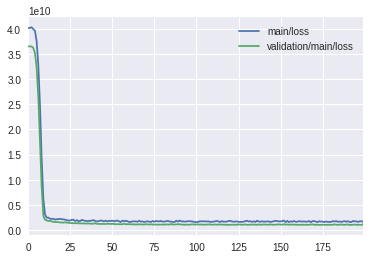

In [103]:
results[["main/loss", "validation/main/loss"]].plot()

In [104]:
chainer.serializers.save_npz("models/house_price_3.npz", model)

In [105]:
test_house_df = pd.read_csv('test.csv')

In [106]:
predict_df = pre_process(test_house_df)

/usr/local/pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [107]:
x = predict_df.values

In [108]:
x = x.astype('f')

In [109]:
sale_prices = []

In [110]:
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
    for i, x_ in enumerate(x):
        x_new = x_
        x_new = x_new[np.newaxis]
        y = model.predictor(x_new)
        sale_prices.append(y.data)

In [111]:
output_df = pd.DataFrame()

In [112]:
sale_prices = np.reshape(sale_prices, 1459)

In [113]:
output_df['Id'] = test_house_df['Id']
output_df['SalePrice'] = np.array(sale_prices)

In [114]:
output_df.head()

,Id,SalePrice
0,1461,119831.265625
1,1462,164859.000000
2,1463,159911.843750
3,1464,207002.375000
4,1465,204783.156250


In [115]:
output_df.to_csv('predict_20190114.csv')